Check KeplerGL

In [14]:
from pathlib import Path
import random

from keplergl import KeplerGl
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from numpy.random import poisson
%matplotlib inline

### Population data:

In [4]:
dfp = (
    gpd
    .read_file("../covid-19-simulation/data/transformed/population.shp")
    .assign(centroid=lambda df: df["geometry"].map(lambda x: x.centroid))
)

In [5]:
dfp.head()

,hood,muni,pop,geometry,centroid
0,Wijk 02 Belgisch Park,'s-Gravenhage,7955,"POLYGON ((4.28747 52.11845, 4.28772 52.11856, ...",POINT (4.29201 52.11208)
1,Wijk 03 Westbroekpark en Duttendel,'s-Gravenhage,1855,"POLYGON ((4.30000 52.09899, 4.29965 52.09913, ...",POINT (4.30321 52.10403)
2,Wijk 04 Benoordenhout,'s-Gravenhage,13320,"POLYGON ((4.32739 52.09566, 4.32748 52.09557, ...",POINT (4.32134 52.09741)
3,Wijk 05 Archipelbuurt,'s-Gravenhage,5720,"POLYGON ((4.29996 52.09864, 4.30039 52.09855, ...",POINT (4.30271 52.09184)
4,Wijk 06 Van Stolkpark en Scheveningse Bosjes,'s-Gravenhage,775,"POLYGON ((4.28612 52.10404, 4.28637 52.10415, ...",POINT (4.29148 52.09752)


## Try kepler

In [6]:
dfpk = (dfp
        .assign(lon=lambda df: df.centroid.map(lambda c: c.x))
        .assign(lat=lambda df: df.centroid.map(lambda c: c.y))
        .assign(inf=0)
        .assign(inf_perc=0)
        [["hood", "lat", "lon", "pop", "inf", "inf_perc",]]
       ).reset_index(drop=True)

In [7]:
MAP_COLS = ["lat", "lon", "pop", "inf", "inf_perc"]

In [8]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "mzprg2",
          "type": "hexagon",
          "config": {
            "dataId": "infections",
            "label": "Point",
            "color": [
              119,
              110,
              87
            ],
            "columns": {
              "lat": "lat",
              "lng": "lon"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 1,
              "worldUnitSize": 5,
              "resolution": 8,
              "colorRange": {
                "name": "Purple Blue Yellow",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#2B1E3E",
                  "#383C65",
                  "#3E5F7E",
                  "#49838A",
                  "#5EA28D",
                  "#82BB92",
                  "#AECEA1",
                  "#D6DEBF"
                ],
                "reversed": False
              },
              "coverage": 1,
              "sizeRange": [
                0,
                100
              ],
              "percentile": [
                0,
                99.94
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 20,
              "hi-precision": False,
              "colorAggregation": "sum",
              "sizeAggregation": "sum",
              "enable3d": True
            }
          },
          "visualChannels": {
            "colorField": {
              "name": "inf",
              "type": "integer"
            },
            "colorScale": "quantize",
            "sizeField": {
              "name": "inf",
              "type": "integer"
            },
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "infections": [
              "inf_ratio"
            ]
          },
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": []
    },
    "mapState": {
      "bearing": -0.6067415730337057,
      'pitch': 37.374216241015446,
      "dragRotate": True,
      'latitude': 52.15502, 
      'longitude': 5.41301,
      "zoom": 7,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "muted_night",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": False,
        "road": False,
        "border": False,
        "building": True,
        "water": True,
        "land": True
      }
    }
  }
}

In [9]:
nl_map = KeplerGl(height=800, data={"infections": dfpk[MAP_COLS]},)
#                   config=config)

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


In [10]:
nl_map

KeplerGl(data={'infections':             lat       lon    pop  inf  inf_perc
0     52.112078  4.292010   7955 …

In [20]:
nl_map.config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '6qyp89o',
     'type': 'point',
     'config': {'dataId': 'infections',
      'label': 'Point',
      'color': [18, 147, 154],
      'columns': {'lat': 'lat', 'lng': 'lon', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50],
       'filled': True},
    

In [16]:
# RESET:
nl_map.add_data(dfpk[MAP_COLS], name="infections")

In [18]:
from time import sleep

In [19]:
dfpk_inf = dfpk.copy()
k = 100
n = len(dfpk)

for _ in range(50):
    rnd_idxes = random.sample(range(0, n - 1), k=k)

    rnd = dfpk_inf.iloc[rnd_idxes].assign(inf=lambda df: df["inf"] + poisson(lam=300, size=k))
    other = dfpk_inf.iloc[list(set(dfpk_inf.index) - set(rnd_idxes))]
    
    dfpk_inf = pd.concat((
        rnd,
        other
    )).sort_values(by=["lon", "lat"])
    
    dfpk_inf["inf_perc"] = (dfpk_inf["inf"] / dfpk_inf["pop"] * 100).clip(0, 100).round(0)
    
    nl_map.add_data(dfpk_inf[MAP_COLS], name="infections")
    sleep(.1)

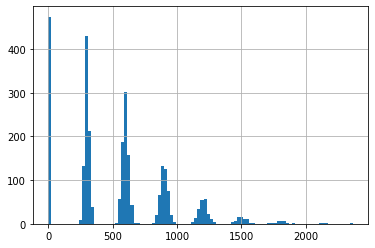

In [21]:
dfpk_inf["inf"].hist(bins=100)

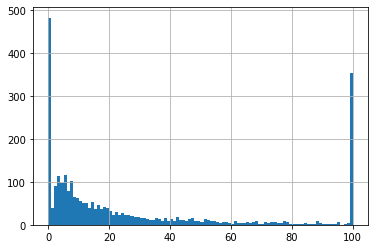

In [22]:
dfpk_inf["inf_perc"].hist(bins=100)

In [23]:
dfpk_inf["inf_perc"].value_counts()

0.0      483
100.0    352
5.0      116
3.0      113
7.0      103
        ... 
97.0       2
87.0       2
90.0       1
81.0       1
69.0       1
Name: inf_perc, Length: 100, dtype: int64